In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("Catalogue.csv",encoding='latin-1')
df.head()

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500
1,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,Volvo,S80 T6,272,très longue,5,5,rouge,False,50500
3,Volvo,S80 T6,272,très longue,5,5,gris,True,35350
4,Volvo,S80 T6,272,très longue,5,5,bleu,True,35350


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   marque     270 non-null    object
 1   nom        270 non-null    object
 2   puissance  270 non-null    int64 
 3   longueur   270 non-null    object
 4   nbPlaces   270 non-null    int64 
 5   nbPortes   270 non-null    int64 
 6   couleur    270 non-null    object
 7   occasion   270 non-null    bool  
 8   prix       270 non-null    int64 
dtypes: bool(1), int64(4), object(4)
memory usage: 17.3+ KB


In [4]:
# On sépare les voitures new des voitures occasion

df_new      = df [ df["occasion"] == False ]
df_occasion = df [ df["occasion"] == True ]

In [5]:
df_new.head()

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500
1,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,Volvo,S80 T6,272,très longue,5,5,rouge,False,50500
5,Volvo,S80 T6,272,très longue,5,5,gris,False,50500
6,Volvo,S80 T6,272,très longue,5,5,bleu,False,50500


In [6]:
# On supprime les duplicats des voitures new

df_new = df_new.drop_duplicates(subset=['nom'])
df_new.describe()

,puissance,nbPlaces,nbPortes,prix
count,32.000000,32.000000,32.000000,32.000000
mean,151.093750,5.250000,4.812500,28744.687500
std,87.607394,0.672022,0.592289,20997.041878
min,55.000000,5.000000,3.000000,7500.000000
25%,102.750000,5.000000,5.000000,17762.500000
50%,135.500000,5.000000,5.000000,24340.000000
75%,166.250000,5.000000,5.000000,30710.000000
max,507.000000,7.000000,5.000000,101300.000000


In [7]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder().fit(['courte','moyenne','longue','tres longue'])

# Tranformation de l'attributs Ordinal "longueur" to Numeric
def transform (x):
    L = ['courte','moyenne','longue','très longue']
    return L.index(x)+1

df_new["longueurNum"] = df_new["longueur"].apply(transform)

In [8]:
df_new.head()

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,longueurNum
0,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500,4
10,Volkswagen,Touran 2.0 FSI,150,longue,7,5,rouge,False,27340,3
21,Volkswagen,Polo 1.2 6V,55,courte,5,3,blanc,False,12200,1
35,Volkswagen,New Beatle 1.8,110,moyenne,5,5,rouge,False,26630,2
45,Volkswagen,Golf 2.0 FSI,150,moyenne,5,5,blanc,False,22900,2


In [9]:
# Sélection des attributs numériques : puissance, nbPlaces, nbPortes, prix, longeurNum
# Après avoir supprimer les voitures d'occasion, on peut ajouter le prix 

X = df_new.iloc[:,[2, 4, 5, 8, 9]]
X.head()

,puissance,nbPlaces,nbPortes,prix,longueurNum
0,272,5,5,50500,4
10,150,7,5,27340,3
21,55,5,3,12200,1
35,110,5,5,26630,2
45,150,5,5,22900,2


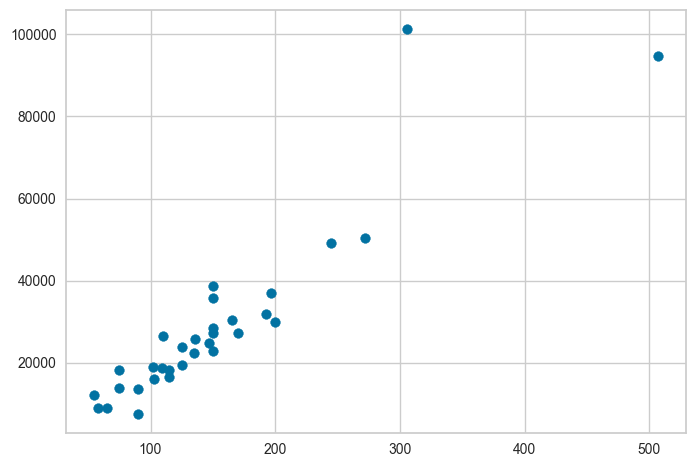

In [10]:
plt.scatter (X["puissance"], X["prix"])

In [11]:
# Normalisation des attributs à l'aide du z-score

def normalize (x) :
    z=x
    if min(z)<max(x):
        z = (x-np.mean(x))/np.std(x)
    return z

In [12]:
X_norm = pd.DataFrame()
X_norm["puissance"] = normalize (X.puissance)
#X_norm["nbPlaces"]  = normalize (X.nbPlaces)
X_norm["nbPortes"]  = normalize (X.nbPortes)
X_norm["longueurNum"]  = normalize (X.longueurNum)
X_norm["prix"] = normalize (X.prix)

In [13]:
X_norm.head()

,puissance,nbPortes,longueurNum,prix
0,1.402175,0.321634,1.455214,1.052692
10,-0.012684,0.321634,0.485071,-0.067970
21,-1.114419,-3.109126,-1.455214,-0.800561
35,-0.476573,0.321634,-0.485071,-0.102325
45,-0.012684,0.321634,-0.485071,-0.282812


In [14]:
X_norm.describe()

,puissance,nbPortes,longueurNum,prix
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01
mean,2.775558e-17,-2.775558e-17,6.938894e-18,-3.469447e-17
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001e+00
min,-1.114419e+00,-3.109126e+00,-1.455214e+00,-1.027984e+00
25%,-5.606524e-01,3.216338e-01,-4.850713e-01,-5.314041e-01
50%,-1.808439e-01,3.216338e-01,4.850713e-01,-2.131332e-01
75%,1.757702e-01,3.216338e-01,4.850713e-01,9.509718e-02
max,4.127518e+00,3.216338e-01,1.455214e+00,3.510793e+00


In [15]:
X_norm.corr()

,puissance,nbPortes,longueurNum,prix
puissance,1.000000,0.311187,0.716720,0.914135
nbPortes,0.311187,1.000000,0.468046,0.268122
longueurNum,0.716720,0.468046,1.000000,0.651152
prix,0.914135,0.268122,0.651152,1.000000


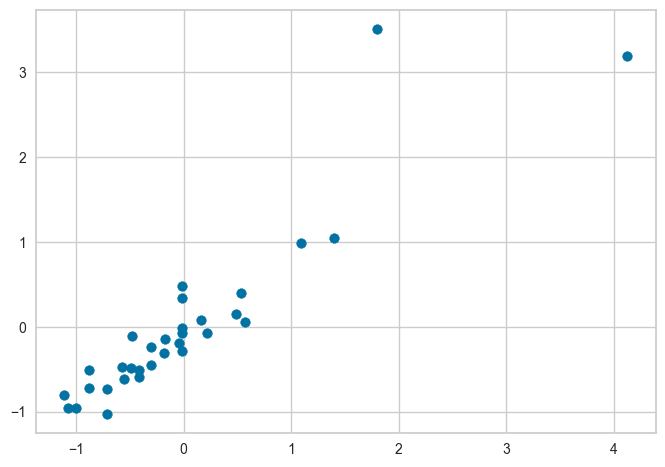

In [16]:
plt.scatter (X_norm["puissance"], X_norm["prix"])

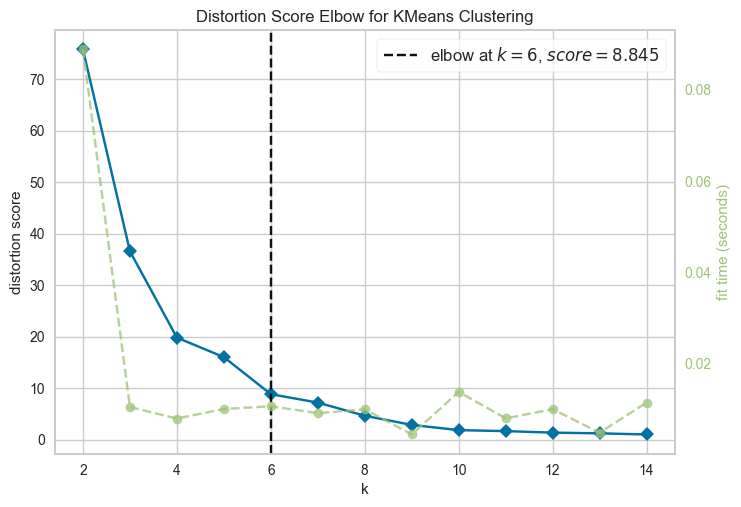

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Visualisation Elbow pour le choix de K pour kmeans

kmeans = KMeans(n_init="auto", random_state=123)

visualizer = KElbowVisualizer(kmeans, k=(2,15))


visualizer.fit(X_norm)        # Fit the data to the visualizer

visualizer.show()        # Finalize and render the figure

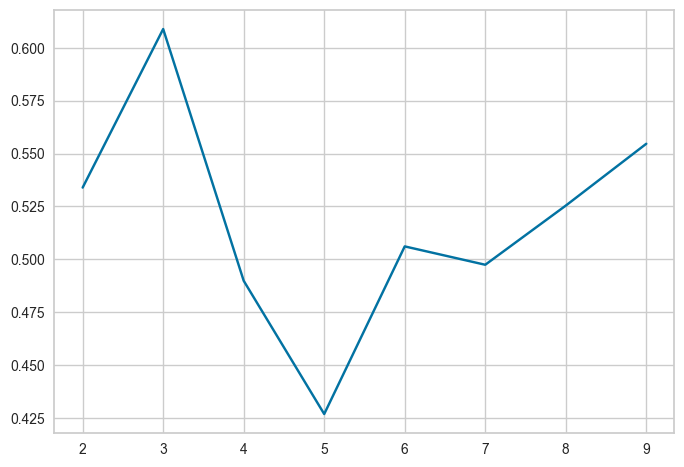

In [18]:
# Visualisation de Silhouette coef pour le choix de K
n_clusters = list (range (2, 10))
silhouettes = []
for k in n_clusters :
    kmeans = KMeans(n_clusters=k, random_state=123, n_init="auto")
    kmeans.fit(X_norm)
    silhouettes.append (silhouette_score(X_norm, kmeans.labels_))

plt.plot(n_clusters, silhouettes)

In [19]:
kmeans = KMeans(n_clusters=3, random_state=123, n_init="auto")
kmeans.fit_predict(X_norm)

array([1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 0])

In [20]:
df_new.insert(10, "Cluster", kmeans.labels_)

In [21]:
df_new

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,longueurNum,Cluster
0,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500,4,1
10,Volkswagen,Touran 2.0 FSI,150,longue,7,5,rouge,False,27340,3,0
21,Volkswagen,Polo 1.2 6V,55,courte,5,3,blanc,False,12200,1,2
35,Volkswagen,New Beatle 1.8,110,moyenne,5,5,rouge,False,26630,2,0
45,Volkswagen,Golf 2.0 FSI,150,moyenne,5,5,blanc,False,22900,2,0
50,Skoda,Superb 2.8 V6,193,très longue,5,5,rouge,False,31790,4,0
55,Seat,Toledo 1.6,102,longue,5,5,blanc,False,18880,3,0
65,Saab,9.3 1.8T,150,longue,5,5,gris,False,38600,3,0
75,Renault,Vel Satis 3.5 V6,245,très longue,5,5,gris,False,49200,4,1
85,Renault,Megane 2.0 16V,135,moyenne,5,5,gris,False,22350,2,0


In [22]:
cluster_3_vehicles = df_new[df_new["Cluster"] == 1]
print(cluster_3_vehicles['puissance'].unique())

# cluster 0 = Family car
# cluster 1 = Luxury car
# cluster 2 = city car

[272 245 306 507]


In [23]:
# Define more descriptive category names for each cluster
category_names = {
    0: 'Family Cars',
    1: 'Luxury Cars',
    2: 'City Cars'
}

In [24]:
df_new.to_excel("Catalogue_Clusters.xlsx")

In [25]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3, random_state=42)
X_red = tsne.fit_transform(X_norm)

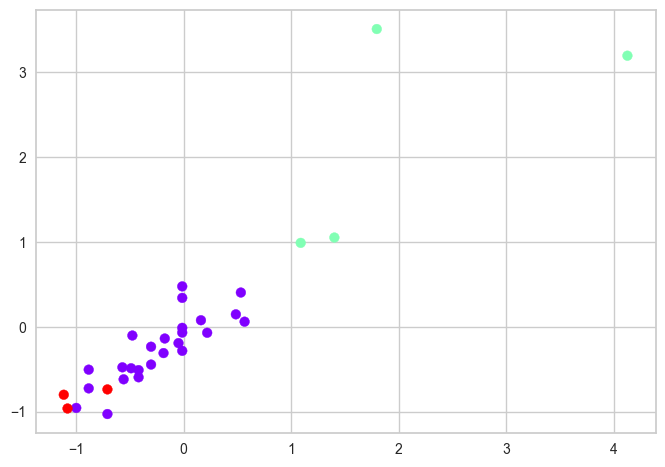

In [26]:
plt.scatter(X_norm["puissance"], X_norm["prix"], c=kmeans.labels_, cmap="rainbow")

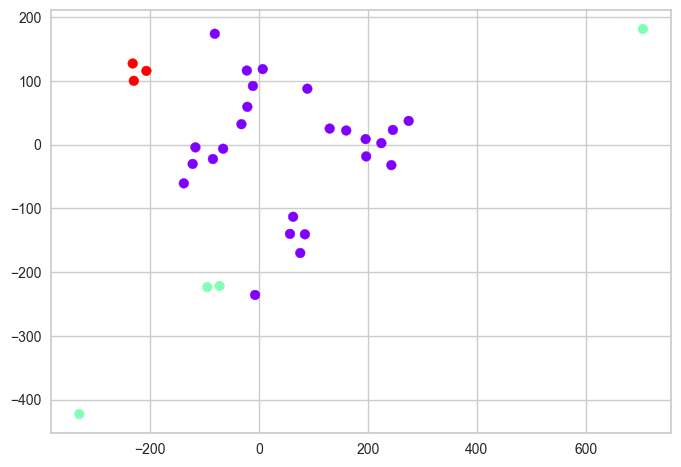

In [27]:
plt.scatter(X_red[:,0], X_red[:,1], c=kmeans.labels_, cmap="rainbow")

Immatriculation

In [28]:
immatriculations_data = pd.read_csv("Immatriculations.csv",encoding='latin-1')
immatriculations_data

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300
1,3721 QS 49,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,150,moyenne,5,5,gris,True,16029
3,3563 LA 55,Peugeot,1007 1.4,75,courte,5,5,blanc,True,9625
4,6963 AX 34,Audi,A2 1.4,75,courte,5,5,gris,False,18310
...,...,...,...,...,...,...,...,...,...,...
1999995,771 CQ 78,Mercedes,S500,306,très longue,5,5,gris,True,70910
1999996,8182 PL 97,Lancia,Ypsilon 1.4 16V,90,courte,5,3,blanc,True,9450
1999997,8550 AP 53,Ford,Mondeo 1.8,125,longue,5,5,rouge,False,23900
1999998,737 MK 20,Audi,A2 1.4,75,courte,5,5,bleu,True,12817


In [29]:
# immatriculations_data = immatriculations_data.drop_duplicates(subset=['immatriculation'])
# immatriculations_data.reset_index()

In [30]:
immatriculations_data

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300
1,3721 QS 49,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,150,moyenne,5,5,gris,True,16029
3,3563 LA 55,Peugeot,1007 1.4,75,courte,5,5,blanc,True,9625
4,6963 AX 34,Audi,A2 1.4,75,courte,5,5,gris,False,18310
...,...,...,...,...,...,...,...,...,...,...
1999995,771 CQ 78,Mercedes,S500,306,très longue,5,5,gris,True,70910
1999996,8182 PL 97,Lancia,Ypsilon 1.4 16V,90,courte,5,3,blanc,True,9450
1999997,8550 AP 53,Ford,Mondeo 1.8,125,longue,5,5,rouge,False,23900
1999998,737 MK 20,Audi,A2 1.4,75,courte,5,5,bleu,True,12817


In [31]:

# df2 = immatriculations_data.pivot_table(index = ['immatriculation'], aggfunc ='size')

In [32]:
# len(df2)

In [33]:
immatriculations_data.isnull().sum()

immatriculation    0
marque             0
nom                0
puissance          0
longueur           0
nbPlaces           0
nbPortes           0
couleur            0
occasion           0
prix               0
dtype: int64

In [34]:
# On sépare les voitures new des voitures occasion

immatriculations_data_new      = immatriculations_data [ immatriculations_data["occasion"] == False ]
immatriculations_data_occasion = immatriculations_data [ immatriculations_data["occasion"] == True ]

In [35]:
# On supprime les duplicats des voitures new

#immatriculations_data_new = immatriculations_data_new.drop_duplicates(subset=['nom'])
immatriculations_data_new.describe()

,puissance,nbPlaces,nbPortes,prix
count,1.374510e+06,1374510.0,1.374510e+06,1.374510e+06
mean,1.915069e+02,5.0,4.848720e+00,3.724381e+04
std,1.356586e+02,0.0,5.288428e-01,2.733563e+04
min,5.500000e+01,5.0,3.000000e+00,7.500000e+03
25%,7.500000e+01,5.0,5.000000e+00,1.831000e+04
50%,1.500000e+02,5.0,5.000000e+00,2.590000e+04
75%,2.450000e+02,5.0,5.000000e+00,4.920000e+04
max,5.070000e+02,5.0,5.000000e+00,1.013000e+05


In [36]:
immatriculations_data_new["longueurNum"] = immatriculations_data_new["longueur"].apply(transform)
immatriculations_data_new

C:\Users\youssef\AppData\Local\Temp\ipykernel_2936\2266542587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immatriculations_data_new["longueurNum"] = immatriculations_data_new["longueur"].apply(transform)


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,longueurNum
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300,3
1,3721 QS 49,Volvo,S80 T6,272,très longue,5,5,noir,False,50500,4
4,6963 AX 34,Audi,A2 1.4,75,courte,5,5,gris,False,18310,1
5,5592 HQ 89,Skoda,Superb 2.8 V6,193,très longue,5,5,bleu,False,31790,4
6,674 CE 26,Renault,Megane 2.0 16V,135,moyenne,5,5,gris,False,22350,2
...,...,...,...,...,...,...,...,...,...,...,...
1999988,3282 YF 65,Volkswagen,Polo 1.2 6V,55,courte,5,3,gris,False,12200,1
1999991,8790 NR 54,Volkswagen,Polo 1.2 6V,55,courte,5,3,blanc,False,12200,1
1999992,6623 GH 58,Ford,Mondeo 1.8,125,longue,5,5,noir,False,23900,3
1999997,8550 AP 53,Ford,Mondeo 1.8,125,longue,5,5,rouge,False,23900,3


In [37]:
features_for_clustering = ['puissance', 'nbPortes', 'longueurNum', 'prix']
X_immatriculations_data_new = immatriculations_data_new.iloc[:,[3, 5, 6, 9, 10]]
X_immatriculations_data_new.head()

,puissance,nbPlaces,nbPortes,prix,longueurNum
0,170,5,5,27300,3
1,272,5,5,50500,4
4,75,5,5,18310,1
5,193,5,5,31790,4
6,135,5,5,22350,2


In [38]:
X_immatriculations_norm = pd.DataFrame()
X_immatriculations_norm["puissance"] = normalize (X_immatriculations_data_new.puissance)
#X_immatriculations_norm["nbPlaces"]  = normalize (X_immatriculations_data_new.nbPlaces)
X_immatriculations_norm["nbPortes"]  = normalize (X_immatriculations_data_new.nbPortes)
X_immatriculations_norm["longueurNum"]  = normalize (X_immatriculations_data_new.longueurNum)
X_immatriculations_norm["prix"] = normalize (X_immatriculations_data_new.prix)

In [39]:
X_immatriculations_norm

,puissance,nbPortes,longueurNum,prix
0,-0.158537,0.286059,0.303827,-0.363767
1,0.593351,0.286059,1.120057,0.484942
4,-0.858825,0.286059,-1.328634,-0.692642
5,0.011006,0.286059,1.120057,-0.199513
6,-0.416538,0.286059,-0.512404,-0.544850
...,...,...,...,...
1999988,-1.006254,-3.495785,-1.328634,-0.916160
1999991,-1.006254,-3.495785,-1.328634,-0.916160
1999992,-0.490252,0.286059,0.303827,-0.488147
1999997,-0.490252,0.286059,0.303827,-0.488147


In [40]:
X_immatriculations_norm['Cluster'] = kmeans.predict(X_immatriculations_norm[features_for_clustering])
X_immatriculations_norm

,puissance,nbPortes,longueurNum,prix,Cluster
0,-0.158537,0.286059,0.303827,-0.363767,0
1,0.593351,0.286059,1.120057,0.484942,0
4,-0.858825,0.286059,-1.328634,-0.692642,0
5,0.011006,0.286059,1.120057,-0.199513,0
6,-0.416538,0.286059,-0.512404,-0.544850,0
...,...,...,...,...,...
1999988,-1.006254,-3.495785,-1.328634,-0.916160,2
1999991,-1.006254,-3.495785,-1.328634,-0.916160,2
1999992,-0.490252,0.286059,0.303827,-0.488147,0
1999997,-0.490252,0.286059,0.303827,-0.488147,0


In [41]:
X_immatriculations_norm['Cluster'].unique()

array([0, 2, 1])

In [42]:
X_immatriculations_norm.corr()

,puissance,nbPortes,longueurNum,prix,Cluster
puissance,1.000000,0.281570,0.778217,0.955327,0.261206
nbPortes,0.281570,1.000000,0.380067,0.268556,-0.807920
longueurNum,0.778217,0.380067,1.000000,0.746844,-0.054919
prix,0.955327,0.268556,0.746844,1.000000,0.300229
Cluster,0.261206,-0.807920,-0.054919,0.300229,1.000000


In [43]:
immatriculations_data_new.insert(11, "Cluster", X_immatriculations_norm['Cluster'])
immatriculations_data_new

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,longueurNum,Cluster
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300,3,0
1,3721 QS 49,Volvo,S80 T6,272,très longue,5,5,noir,False,50500,4,0
4,6963 AX 34,Audi,A2 1.4,75,courte,5,5,gris,False,18310,1,0
5,5592 HQ 89,Skoda,Superb 2.8 V6,193,très longue,5,5,bleu,False,31790,4,0
6,674 CE 26,Renault,Megane 2.0 16V,135,moyenne,5,5,gris,False,22350,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1999988,3282 YF 65,Volkswagen,Polo 1.2 6V,55,courte,5,3,gris,False,12200,1,2
1999991,8790 NR 54,Volkswagen,Polo 1.2 6V,55,courte,5,3,blanc,False,12200,1,2
1999992,6623 GH 58,Ford,Mondeo 1.8,125,longue,5,5,noir,False,23900,3,0
1999997,8550 AP 53,Ford,Mondeo 1.8,125,longue,5,5,rouge,False,23900,3,0


In [44]:
immatriculations_data_new.to_csv("Immatriculation_Clusters.csv", index=False)

In [45]:
immatriculations_data_new["Cluster"].unique()

array([0, 2, 1])

Clients

In [46]:
clients_data = pd.read_csv("Clients.csv",encoding='latin-1')
clients_data

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation
0,25,F,159,En Couple,2,false,3467 SB 72
1,53,M,594,En Couple,2,false,113 LY 42
2,20,F,949,En Couple,1,false,925 WK 87
3,29,M,571,En Couple,2,false,3279 RV 81
4,47,M,502,En Couple,1,false,82 RZ 54
...,...,...,...,...,...,...,...
99995,40,M,211,Célibataire,0,false,492 KF 53
99996,33,M,433,Célibataire,0,false,6346 NL 15
99997,21,M,599,En Couple,2,false,5803 LS 45
99998,22,M,229,En Couple,2,false,3783 DX 64


preprocessing

In [47]:
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 100000 non-null  object
 1   sexe                100000 non-null  object
 2   taux                100000 non-null  object
 3   situationFamiliale  100000 non-null  object
 4   nbEnfantsAcharge    100000 non-null  object
 5   2eme voiture        100000 non-null  object
 6   immatriculation     100000 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [48]:
clients_data["age"].unique()

array(['25', '53', '20', '29', '47', '52', '58', '21', '42', '66', '54',
       '41', '63', '46', '43', '23', '49', '65', '24', '64', '45', '40',
       '28', '18', '32', '34', '36', '55', '79', '33', '39', '48', '71',
       '51', '57', '37', '81', '75', '62', '19', '30', '67', '26', '22',
       '80', '83', '82', '38', '35', '72', '70', '27', '77', '59', '60',
       ' ', '31', '73', '76', '61', '44', '68', '69', '50', '78', '56',
       '74', '84', '?', '-1'], dtype=object)

In [49]:
clients_data['age'].replace('-1', np.nan, inplace=True)
clients_data['age'].replace(' ', np.nan, inplace=True)
clients_data['age'].replace('?', np.nan, inplace=True)


In [50]:
clients_data["taux"].unique()

array(['159', '594', '949', ..., '751', '882', '900'], dtype=object)

In [51]:
clients_data['taux'].replace(['-1',' ','?'], np.nan, inplace=True)


In [52]:
clients_data["situationFamiliale"].unique()

array(['En Couple', 'Célibataire', 'Seule', ' ', 'Marié(e)', 'N/D',
       'Divorcée', 'Seul', '?'], dtype=object)

In [53]:
clients_data['situationFamiliale'].replace([' ','?','N/D'], np.nan, inplace=True)


In [54]:
clients_data['situationFamiliale'] = clients_data['situationFamiliale'].str.lower()

# Group similar categories
clients_data['situationFamiliale'] = clients_data['situationFamiliale'].replace({
    'en couple': 'en couple',
    'célibataire': 'célibataire',
    'seule': 'célibataire',  
    'marié(e)': 'marié(e)',
    'divorcée': 'divorcée',
    'seul': 'célibataire',  
})

In [55]:
clients_data["sexe"].unique()

array(['F', 'M', 'Homme', 'Masculin', 'Féminin', ' ', 'Femme', 'N/D', '?'],
      dtype=object)

In [56]:
clients_data['sexe'].replace(['N/D', '?', ' '], np.nan, inplace=True)

clients_data['sexe'] = clients_data['sexe'].str.lower()

clients_data['sexe'] = clients_data['sexe'].replace({
    'homme': 'm',
    'masculin': 'm',
    'féminin': 'f',
    'femme': 'f',
})

In [57]:
clients_data["nbEnfantsAcharge"].unique()

array(['2', '1', '3', '4', '0', '-1', ' ', '?'], dtype=object)

In [58]:
clients_data['nbEnfantsAcharge'].replace(['-1',' ','?'], np.nan, inplace=True)


In [59]:
clients_data["2eme voiture"].unique()

array(['false', 'true', ' ', '?'], dtype=object)

In [60]:
clients_data['2eme voiture'].replace([' ','?'], np.nan, inplace=True)

In [61]:
clients_data["immatriculation"].unique()

array(['3467 SB 72', '113 LY 42', '925 WK 87', ..., '5803 LS 45',
       '3783 DX 64', '4656 EJ 74'], dtype=object)

In [62]:
clients_data['immatriculation'].replace([' ','?'], np.nan, inplace=True)

delete missing values

In [63]:
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 99697 non-null   object
 1   sexe                99709 non-null   object
 2   taux                99706 non-null   object
 3   situationFamiliale  99681 non-null   object
 4   nbEnfantsAcharge    99693 non-null   object
 5   2eme voiture        99780 non-null   object
 6   immatriculation     100000 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [64]:
clients_data = clients_data.dropna()
clients_data.reset_index()

,index,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation
0,0,25,f,159,en couple,2,false,3467 SB 72
1,1,53,m,594,en couple,2,false,113 LY 42
2,2,20,f,949,en couple,1,false,925 WK 87
3,3,29,m,571,en couple,2,false,3279 RV 81
4,4,47,m,502,en couple,1,false,82 RZ 54
...,...,...,...,...,...,...,...,...
98272,99995,40,m,211,célibataire,0,false,492 KF 53
98273,99996,33,m,433,célibataire,0,false,6346 NL 15
98274,99997,21,m,599,en couple,2,false,5803 LS 45
98275,99998,22,m,229,en couple,2,false,3783 DX 64


In [65]:
clients_data

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation
0,25,f,159,en couple,2,false,3467 SB 72
1,53,m,594,en couple,2,false,113 LY 42
2,20,f,949,en couple,1,false,925 WK 87
3,29,m,571,en couple,2,false,3279 RV 81
4,47,m,502,en couple,1,false,82 RZ 54
...,...,...,...,...,...,...,...
99995,40,m,211,célibataire,0,false,492 KF 53
99996,33,m,433,célibataire,0,false,6346 NL 15
99997,21,m,599,en couple,2,false,5803 LS 45
99998,22,m,229,en couple,2,false,3783 DX 64


In [66]:
immatriculations_data_new

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,longueurNum,Cluster
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300,3,0
1,3721 QS 49,Volvo,S80 T6,272,très longue,5,5,noir,False,50500,4,0
4,6963 AX 34,Audi,A2 1.4,75,courte,5,5,gris,False,18310,1,0
5,5592 HQ 89,Skoda,Superb 2.8 V6,193,très longue,5,5,bleu,False,31790,4,0
6,674 CE 26,Renault,Megane 2.0 16V,135,moyenne,5,5,gris,False,22350,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1999988,3282 YF 65,Volkswagen,Polo 1.2 6V,55,courte,5,3,gris,False,12200,1,2
1999991,8790 NR 54,Volkswagen,Polo 1.2 6V,55,courte,5,3,blanc,False,12200,1,2
1999992,6623 GH 58,Ford,Mondeo 1.8,125,longue,5,5,noir,False,23900,3,0
1999997,8550 AP 53,Ford,Mondeo 1.8,125,longue,5,5,rouge,False,23900,3,0


In [67]:
clients_data = pd.merge(clients_data, immatriculations_data_new[['immatriculation', 'Cluster']], on='immatriculation', how='left')

In [68]:
clients_data

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Cluster
0,25,f,159,en couple,2,false,3467 SB 72,0.0
1,53,m,594,en couple,2,false,113 LY 42,0.0
2,20,f,949,en couple,1,false,925 WK 87,0.0
3,29,m,571,en couple,2,false,3279 RV 81,0.0
4,47,m,502,en couple,1,false,82 RZ 54,0.0
...,...,...,...,...,...,...,...,...
98450,40,m,211,célibataire,0,false,492 KF 53,2.0
98451,33,m,433,célibataire,0,false,6346 NL 15,0.0
98452,21,m,599,en couple,2,false,5803 LS 45,0.0
98453,22,m,229,en couple,2,false,3783 DX 64,0.0


In [69]:
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98455 entries, 0 to 98454
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 98455 non-null  object 
 1   sexe                98455 non-null  object 
 2   taux                98455 non-null  object 
 3   situationFamiliale  98455 non-null  object 
 4   nbEnfantsAcharge    98455 non-null  object 
 5   2eme voiture        98455 non-null  object 
 6   immatriculation     98455 non-null  object 
 7   Cluster             67704 non-null  float64
dtypes: float64(1), object(7)
memory usage: 6.0+ MB


In [70]:
clients_data = clients_data.dropna()
clients_data.reset_index()

,index,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Cluster
0,0,25,f,159,en couple,2,false,3467 SB 72,0.0
1,1,53,m,594,en couple,2,false,113 LY 42,0.0
2,2,20,f,949,en couple,1,false,925 WK 87,0.0
3,3,29,m,571,en couple,2,false,3279 RV 81,0.0
4,4,47,m,502,en couple,1,false,82 RZ 54,0.0
...,...,...,...,...,...,...,...,...,...
67699,98450,40,m,211,célibataire,0,false,492 KF 53,2.0
67700,98451,33,m,433,célibataire,0,false,6346 NL 15,0.0
67701,98452,21,m,599,en couple,2,false,5803 LS 45,0.0
67702,98453,22,m,229,en couple,2,false,3783 DX 64,0.0


In [71]:
clients_data["Cluster"] = clients_data["Cluster"].astype(int)

C:\Users\youssef\AppData\Local\Temp\ipykernel_2936\2469691063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients_data["Cluster"] = clients_data["Cluster"].astype(int)


In [72]:
clients_data

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Cluster
0,25,f,159,en couple,2,false,3467 SB 72,0
1,53,m,594,en couple,2,false,113 LY 42,0
2,20,f,949,en couple,1,false,925 WK 87,0
3,29,m,571,en couple,2,false,3279 RV 81,0
4,47,m,502,en couple,1,false,82 RZ 54,0
...,...,...,...,...,...,...,...,...
98450,40,m,211,célibataire,0,false,492 KF 53,2
98451,33,m,433,célibataire,0,false,6346 NL 15,0
98452,21,m,599,en couple,2,false,5803 LS 45,0
98453,22,m,229,en couple,2,false,3783 DX 64,0


In [73]:
clients_data.to_csv("Clients_Clusters.csv", index=False)

In [74]:
clients_data["Cluster"].unique()

array([0, 1, 2])

In [75]:
clients_corr = clients_data.iloc[:,[0,2,4,7]]

clients_corr.corr()

,age,taux,nbEnfantsAcharge,Cluster
age,1.000000,0.076717,-0.023992,0.060576
taux,0.076717,1.000000,-0.002805,0.051282
nbEnfantsAcharge,-0.023992,-0.002805,1.000000,0.074875
Cluster,0.060576,0.051282,0.074875,1.000000


convert qualitative variables to numeric values

In [76]:
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67704 entries, 0 to 98454
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 67704 non-null  object
 1   sexe                67704 non-null  object
 2   taux                67704 non-null  object
 3   situationFamiliale  67704 non-null  object
 4   nbEnfantsAcharge    67704 non-null  object
 5   2eme voiture        67704 non-null  object
 6   immatriculation     67704 non-null  object
 7   Cluster             67704 non-null  int32 
dtypes: int32(1), object(7)
memory usage: 4.4+ MB


In [77]:
clients_data['sexe'] = clients_data['sexe'].map({'m': 0, 'f': 1})
clients_data['situationFamiliale'] = clients_data['situationFamiliale'].map({'en couple': 0, 'célibataire': 1, 'marié(e)':2,'divorcée':3,'marié(e)':4})
clients_data['2eme voiture'] = clients_data['2eme voiture'].map({'false': 0, 'true': 1})


C:\Users\youssef\AppData\Local\Temp\ipykernel_2936\2550022103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients_data['sexe'] = clients_data['sexe'].map({'m': 0, 'f': 1})
C:\Users\youssef\AppData\Local\Temp\ipykernel_2936\2550022103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients_data['situationFamiliale'] = clients_data['situationFamiliale'].map({'en couple': 0, 'célibataire': 1, 'marié(e)':2,'divorcée':3,'marié(e)':4})
C:\Users\youssef\AppData\Local\Temp\ipykernel_2936\2550022103.py:3

In [78]:
clients_data

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Cluster
0,25,1,159,0,2,0,3467 SB 72,0
1,53,0,594,0,2,0,113 LY 42,0
2,20,1,949,0,1,0,925 WK 87,0
3,29,0,571,0,2,0,3279 RV 81,0
4,47,0,502,0,1,0,82 RZ 54,0
...,...,...,...,...,...,...,...,...
98450,40,0,211,1,0,0,492 KF 53,2
98451,33,0,433,1,0,0,6346 NL 15,0
98452,21,0,599,0,2,0,5803 LS 45,0
98453,22,0,229,0,2,0,3783 DX 64,0


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [80]:
# Features for classification (you might need to adjust this based on your data)
features_for_classification = ['age', 'sexe', 'taux', 'situationFamiliale', 'nbEnfantsAcharge', '2eme voiture']

# Target variable
target_variable = 'Cluster'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(clients_data[features_for_classification], clients_data[target_variable],train_size=0.8 ,test_size=0.2, random_state=42)

In [81]:
# Train a classification model (you can choose a different model based on your preferences)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
# Predict on the test set
predictions = classifier.predict(X_test)

In [83]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8310316815597075


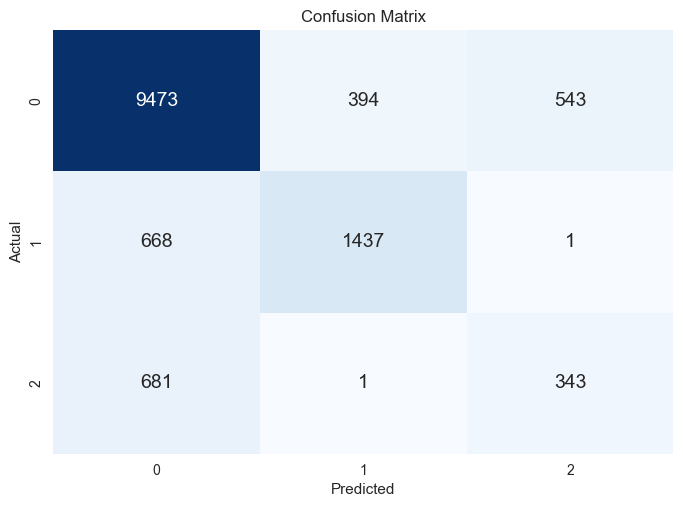

In [84]:
# Create a confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a classification report
report = classification_report(y_test, predictions)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [85]:
# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.88      0.91      0.89     10410
           1       0.78      0.68      0.73      2106
           2       0.39      0.33      0.36      1025

    accuracy                           0.83     13541
   macro avg       0.68      0.64      0.66     13541
weighted avg       0.82      0.83      0.83     13541



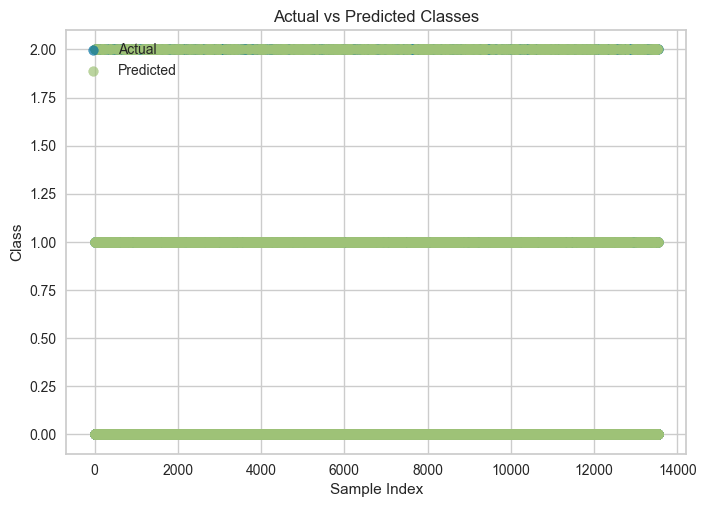

In [86]:
# Visualize the predicted classes
plt.scatter(np.arange(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.scatter(np.arange(len(y_test)), predictions, label='Predicted', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Actual vs Predicted Classes')
plt.legend()
plt.show()

marketing

In [87]:
marketing = pd.read_csv("Marketing.csv",encoding='latin-1')
marketing

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
0,21,F,1396,Célibataire,0,False
1,35,M,223,Célibataire,0,False
2,48,M,401,Célibataire,0,False
3,26,F,420,En Couple,3,True
4,80,M,530,En Couple,3,False
5,27,F,153,En Couple,2,False
6,59,F,572,En Couple,2,False
7,43,F,431,Célibataire,0,False
8,64,M,559,Célibataire,0,False
9,22,M,154,En Couple,1,False


In [88]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 20 non-null     int64 
 1   sexe                20 non-null     object
 2   taux                20 non-null     int64 
 3   situationFamiliale  20 non-null     object
 4   nbEnfantsAcharge    20 non-null     int64 
 5   2eme voiture        20 non-null     bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 948.0+ bytes


In [89]:
marketing_data= marketing.copy()
marketing_data['sexe'] = marketing_data['sexe'].str.lower()
marketing_data['situationFamiliale'] = marketing_data['situationFamiliale'].str.lower()

marketing_data['2eme voiture'] = marketing_data['2eme voiture'].astype(str)
marketing_data['2eme voiture'] = marketing_data['2eme voiture'].str.lower()
marketing_data

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
0,21,f,1396,célibataire,0,false
1,35,m,223,célibataire,0,false
2,48,m,401,célibataire,0,false
3,26,f,420,en couple,3,true
4,80,m,530,en couple,3,false
5,27,f,153,en couple,2,false
6,59,f,572,en couple,2,false
7,43,f,431,célibataire,0,false
8,64,m,559,célibataire,0,false
9,22,m,154,en couple,1,false


In [90]:
marketing_data['sexe'] = marketing_data['sexe'].map({'m': 0, 'f': 1})
marketing_data['situationFamiliale'] = marketing_data['situationFamiliale'].map({'en couple': 0, 'célibataire': 1, 'marié(e)':2,'divorcée':3,'marié(e)':4})
marketing_data['2eme voiture'] = marketing_data['2eme voiture'].map({'false': 0, 'true': 1})
marketing_data

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
0,21,1,1396,1,0,0
1,35,0,223,1,0,0
2,48,0,401,1,0,0
3,26,1,420,0,3,1
4,80,0,530,0,3,0
5,27,1,153,0,2,0
6,59,1,572,0,2,0
7,43,1,431,1,0,0
8,64,0,559,1,0,0
9,22,0,154,0,1,0


In [91]:
# Use the trained model to predict car categories for marketing data
marketing_data['predictedCategory'] = classifier.predict(marketing_data[features_for_classification])

In [92]:
marketing_data

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,predictedCategory
0,21,1,1396,1,0,0,0
1,35,0,223,1,0,0,2
2,48,0,401,1,0,0,0
3,26,1,420,0,3,1,0
4,80,0,530,0,3,0,0
5,27,1,153,0,2,0,0
6,59,1,572,0,2,0,0
7,43,1,431,1,0,0,0
8,64,0,559,1,0,0,2
9,22,0,154,0,1,0,0


In [93]:
category_names = {
    0: 'Family Cars',
    1: 'Luxury Cars',
    2: 'City Cars'
}

In [94]:
#transfer clusters to category name
marketing['category'] = marketing_data['predictedCategory'].map(category_names)


In [95]:
marketing

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,category
0,21,F,1396,Célibataire,0,False,Family Cars
1,35,M,223,Célibataire,0,False,City Cars
2,48,M,401,Célibataire,0,False,Family Cars
3,26,F,420,En Couple,3,True,Family Cars
4,80,M,530,En Couple,3,False,Family Cars
5,27,F,153,En Couple,2,False,Family Cars
6,59,F,572,En Couple,2,False,Family Cars
7,43,F,431,Célibataire,0,False,Family Cars
8,64,M,559,Célibataire,0,False,City Cars
9,22,M,154,En Couple,1,False,Family Cars


In [96]:
marketing.to_csv("Marketing_Clusters.csv", index=False)

save the model

In [101]:
import pickle

model_pkl_file = "category_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(classifier, file)